 🌟 [Online access to Addie Jasica's Data Science Final Tutorial.](https://ajasica.github.io/ "ajasica.github.io"). 🌟

![alt text](https://nccd.cdc.gov/TemplatePackage/3.0/css/lib/cdcmaps/images/hhs-cdc-logo.svg "CDC")



<p style="text-align: center; font-size: 25px; font-weight: bold;"> Deaths in Louisiana: An Analysis of Avilable Data </p>

<p style="text-align: center; font-weight:bold;">Addie Jasica</p>  


<p style="text-align: center;">Final Data Science Tutorial - CMPS 3660-02 - Introduction to Data Science - Professor Mattei</p>

---

## 1. Introduction


**Background**

At Tulane University, students have the wonderful opportunity to study and take classes across mutliple disciplines and I have decided to major in both Computer Science and Public Health. Dispite the limited overlaps in coursework and people interested in these two majors, I have begun to find interesting ways where I can take different parts of my multidiciplinary eduction and offer new insights.

For this project, I will be providing a data science analysis to public health data, which has been meticulously collected by federal and local agencies for a very long time, even while these agencies did not have the necessary experts working on analyzing the collected data. This project aims to fill some gaps by providing exploratory data analysis and evaluating shifts in causes of death within Lousiana over 17 years.

As the United States both develops and makes use of medical advances like vaccinations, vector control, and new treatments, the public health discipline has been able to turn its focus from communicable diseases to chronic diseases and other phenomena that are deleterious to human health. I expect much of the causes of death to be less of communicable disease but rather chronic conditions like heart disease or accidents/injury. I would like to warn in advance, that since we are evaluating data about causes of death, this project will be rather morbid. However, this data is quite interesting, very relevant to my two majors, and necessary to investigate to evaluate past and prepare furture public health interventions.

**Data Source**

Ultimately, I have decided to use the Center for Disease Control and Prevention (CDC)/National Center for Health Statistics' dataset called [Underlying Cause of Death, 1999-2017](https://wonder.cdc.gov/ucd-icd10.html). It is published on the CDC WONDER (Wide-ranging ONline Data for Epidemiologic Research) site which is a public resource which makes datasets available to CDC staff, public health departments, researchers, and others. The CDC envisions these datasets to inform "public health research, decision making, priority setting, program evaluation, and resource allocation." This data is collected for all United State Counties and is based off of death certificates for United States residents. Every death certificate must code the death with one single underlying cause of death in the form of a 4-digit ICD-10 code or group of codes. The website allows for patrons to download the dataset grouping by various factors. I have downloaded a dataset that holds causes of death in Louisiana broken down by year and age bracket. For those groupings, the data offers the cause of death, the absolute number of deaths, and the death rate based off of the population. I have chosen to not include deaths of infants under 1 year old due to those deaths following a separate set of codes.

This dataset was downloaded in two parts, the first is years 1999-2009 and the second is years 2010-2017. They are slightly more complicated to load since they are text files and not comma separated value files.

Limitions of this datasource include the dataset's lack of undocumented deaths. If a death did not have a death certificate it is not counted in this dataset. Additionally the size of this dataset demanded that I narrow my scope to only Lousiana counties and thus deaths within Louisiana. The is a limit on the amount of records that can be downloaded from the [CDC Wonder site](https://wonder.cdc.gov/). However, narrowing my scope allows me to dive deeper into data that is more relevant to me, as a Louisiana resident and student.

The offical documentation of the "Underlying Case of Death" dataset is found at https://wonder.cdc.gov/wonder/help/ucd.html#. 

More information about CDC WONDER see their [documentation](https://wonder.cdc.gov/wonder/help/main.html#What%20is%20WONDER) or [this infographic](https://wonder.cdc.gov/wonder/help/about-cdc-wonder-508.pdf) about CDC WONDER.

**Github Website**

The website is linked in the first cell and can be found at [ajasica.github.io](https://ajasica.github.io).

---

## 2. Data: Extraction, Transform, and Load

**Extraction**

This dataset was extracted from the [CDC Wonder Website](https://wonder.cdc.gov/ucd-icd10.html). Here, after agreeing the dataset's use restrictions, you can select your own queries based upon how you want the data broken down. This data can be broken down by location on various levels including state, county, census region/divisions, and HHS region levels. Additionally it allows you the opportunity to select age ranges, age brackets, year selections, racial breakdowns, place of death, and the system with which you want the data coded.

**Load**

For this project, I unitlized Python 3, [pandas](https://pandas.pydata.org/pandas-docs/stable/), [maplotlib](https://matplotlib.org/contents.html), and more. Our first code cell will be importing the necessary libraries.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import numpy

To load this data, I utilized pandas' read_csv() function showing the seperator value as a tab. The heads of each table (without any transformation or cleaning) are displayed below.

In [2]:
deaths99_09 = pd.read_csv('Underlying Cause of Death, 1999-2009 LA.txt', sep="\t")
deaths10_17 = pd.read_csv('Underlying Cause of Death, 2010-2017 LA.txt', sep="\t")

In [3]:
deaths99_09.head()

,Notes,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,NaN,1999,1999,1-4 years,1-4,"#Congenital malformations, deformations and ch...",GR113-109,12,253052,Unreliable
1,NaN,1999,1999,1-4 years,1-4,All other diseases (Residual),GR113-111,18,253052,Unreliable
2,NaN,1999,1999,1-4 years,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,46,253052,18.2
3,NaN,1999,1999,1-4 years,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,24,253052,9.5
4,NaN,1999,1999,1-4 years,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,21,253052,8.3


In [4]:
deaths10_17.head()

,Notes,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,NaN,2010,2010,1-4 years,1-4,All other diseases (Residual),GR113-111,10,252378,Unreliable
1,NaN,2010,2010,1-4 years,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,35,252378,13.9
2,NaN,2010,2010,1-4 years,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,15,252378,Unreliable
3,NaN,2010,2010,1-4 years,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,15,252378,Unreliable
4,NaN,2010,2010,1-4 years,1-4,"Nontransport accidents (W00-X59,Y86)",GR113-117,20,252378,7.9


**Transformation and Tidying**

First, these two dataframes should be combined and the extra "Notes" (which I confirmed holds nothing but NaNs) should be dropped. Additionally, the "Crude Rate" column holds an object with the calculation of the death / population * 100,000 so it is the death rate per 100,000 people. For causes with small amounts of deaths, the death rate is marked as "Unreliable" and so in changing that column to a numeric, those "Unreliable" cells are now NaNs.

In [5]:
deaths_df = pd.concat([deaths99_09, deaths10_17], ignore_index=True)
deaths_df.drop("Notes", axis=1, inplace=True)
deaths_df.head()

,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,1999,1999,1-4 years,1-4,"#Congenital malformations, deformations and ch...",GR113-109,12,253052,Unreliable
1,1999,1999,1-4 years,1-4,All other diseases (Residual),GR113-111,18,253052,Unreliable
2,1999,1999,1-4 years,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,46,253052,18.2
3,1999,1999,1-4 years,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,24,253052,9.5
4,1999,1999,1-4 years,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,21,253052,8.3


In [6]:
deaths_df["Crude Rate"] = pd.to_numeric(deaths_df["Crude Rate"], errors="coerce")
deaths_df.head()

,Year,Year Code,Ten-Year Age Groups,Ten-Year Age Groups Code,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate
0,1999,1999,1-4 years,1-4,"#Congenital malformations, deformations and ch...",GR113-109,12,253052,NaN
1,1999,1999,1-4 years,1-4,All other diseases (Residual),GR113-111,18,253052,NaN
2,1999,1999,1-4 years,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,46,253052,18.2
3,1999,1999,1-4 years,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,24,253052,9.5
4,1999,1999,1-4 years,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,21,253052,8.3


Next, I wanted to see the difference between the "Year" and "Year Code" column. Using the .unique() function, you can see that these columns are redundant. Thus I will drop the "Year Code" column.

In [7]:
print(deaths_df["Year"].unique())
print(deaths_df["Year Code"].unique())

deaths_df.drop("Year Code", axis=1, inplace=True)

[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
[1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]


Similarly, the "Ten-Year Age Groups" and "Ten-Year Age Groups Code" columns hold the same information just in slightly different formats so I will keep the latter which is the simpler of the two columns. I will also rename the column to simplify.

In [8]:
print(deaths_df["Ten-Year Age Groups"].unique())
print(deaths_df["Ten-Year Age Groups Code"].unique())

deaths_df.drop("Ten-Year Age Groups", axis=1, inplace=True)
deaths_df.rename(columns={"Ten-Year Age Groups Code" : "Age Range"}, inplace=True)

['1-4 years' '5-14 years' '15-24 years' '25-34 years' '35-44 years'
 '45-54 years' '55-64 years' '65-74 years' '75-84 years' '85+ years']
['1-4' '5-14' '15-24' '25-34' '35-44' '45-54' '55-64' '65-74' '75-84'
 '85+']


Finally, in the cleaning proccess I wanted to identify if the `ICD-10 113 Cause List` column needed any tidying. Utilizing isnull() to look for NaNs in the column and utilizing unique() to quickly look through all of the columns for any unfilled columns. As seen below, each cause has a code or group of codes associated with it and every row has a cause.

In [9]:
deaths_df["ICD-10 113 Cause List"].isnull().sum()

0

In [10]:
deaths_df["ICD-10 113 Cause List"].unique()

array(['#Congenital malformations, deformations and chromosomal abnormalities (Q00-Q99)',
       'All other diseases (Residual) ',
       '#Accidents (unintentional injuries) (V01-X59,Y85-Y86)',
       'Transport accidents (V01-V99,Y85)',
       'Motor vehicle accidents (V02-V04,V09.0,V09.2,V12-V14,V19.0-V19.2,V19.4-V19.6,V20-V79,V80.3-V80.5,V81.0-V81.1,V82.0-V82.1,V83-V86,V87.0-V87.8,V88.0-V88.8,V89.0,V89.2)',
       'Nontransport accidents (W00-X59,Y86)',
       'Accidental drowning and submersion (W65-W74)',
       '#Malignant neoplasms (C00-C97)',
       'Major cardiovascular diseases (I00-I78)',
       'Accidental exposure to smoke, fire and flames (X00-X09)',
       '#Assault (homicide) (*U01-*U02,X85-Y09,Y87.1)',
       'Malignant neoplasms of lymphoid, hematopoietic and related tissue (C81-C96)',
       'Leukemia (C91-C95)',
       '#Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Other heart diseases (I26-I51)',
       'All other forms of heart disease (I26-I28,I34-I38,I

Since, the `ICD-10 113 Cause List` column is tidy and every row had a cause, I simplified the causes by removing the code part of the cause text using a regular expression. This regular expression searches for a white space followed by a set of parentheses where the text inside of the parentheses may or may not have a `*` and then a code made up of one letter and two digits. The code could be followed by the end of the parenthesis, a space and another code, or a `-` which led into the second part of the code. The following regular expression accounts for all of options.

In [11]:
for index, row in deaths_df.iterrows():
    deaths_df.loc[index, "Cause"] = re.sub(r'\W\(\*?\D\d{2}.*|\,\)', '', row["ICD-10 113 Cause List"])

Then since we have trimed the Cause column and added it to the `deaths_df` dataframe in a new column called `Cause`, we can drop the old column and the column that held the ICD-10 code without the text. Since this project is an exercise in evaluating causes of deaths we no longer need to offical coding from the death certificates.

In [12]:
deaths = deaths_df.drop(["ICD-10 113 Cause List Code", "ICD-10 113 Cause List"], axis=1)

The full, cleaned dataset is shown below:

In [13]:
deaths = deaths[["Year", "Age Range", "Cause", "Deaths", "Population", "Crude Rate"]]
deaths

,Year,Age Range,Cause,Deaths,Population,Crude Rate
0,1999,1-4,"#Congenital malformations, deformations and ch...",12,253052,NaN
1,1999,1-4,All other diseases (Residual),18,253052,NaN
2,1999,1-4,#Accidents (unintentional injuries),46,253052,18.2
3,1999,1-4,Transport accidents,24,253052,9.5
4,1999,1-4,Motor vehicle accidents,21,253052,8.3
5,1999,1-4,Nontransport accidents,22,253052,8.7
6,1999,1-4,Accidental drowning and submersion,11,253052,NaN
7,1999,5-14,#Malignant neoplasms,13,689702,NaN
8,1999,5-14,Major cardiovascular diseases,10,689702,NaN
9,1999,5-14,"#Congenital malformations, deformations and ch...",14,689702,NaN


---

## 3. Exploratory Data Analysis

### Plot A: Deaths and Population in Louisiana by Year

Below, I began my exploratory analysis by taking the sums of the state's population and deaths per year.

Deaths per year were easy to collect since the data gives you the raw numbers of deaths per category per age per year. Thus we only had to group by year.

However the population value is repeated multiple times in the dataset since for each age bracket in a year the population is the repeated for each cause. Thus I grouped by Year and Age Range, used describe() to get the mean. Since the population is repeated and the same for each year/age range, the mean just returns the population. So I 1) .loc[] by the year I am interested,2) take the mean column that is returned by the .describe() function, and then 3) take the sum over the various age brackets. This was rather complicated but once checking the numbers by hand and according to census data, a population ranging between 4.3 and 4.6 million over 1999-2017 is correct. 

In [14]:
pops = []
group_obj = deaths.groupby(["Year", "Age Range"])
for year in range(1999,2018):
    pops.append(int(group_obj.Population.describe().loc[year]["mean"].sum()))

In [15]:
year_info = pd.DataFrame()
year_info["Deaths"] = deaths.groupby("Year")["Deaths"].sum()
year_info["Population"] = pops
year_info

,Deaths,Population
Year,,
1999,102013,4396502
2000,100337,4404884
2001,100980,4412537
2002,100069,4432799
2003,102179,4457366
2004,99466,4487645
2005,103973,4512012
2006,93326,4250375
2007,93029,4310967


In [16]:
year_info.describe().loc["mean"]

Deaths        9.892258e+04
Population    4.472948e+06
Name: mean, dtype: float64

Text(0, 0.5, 'Deaths in LA')

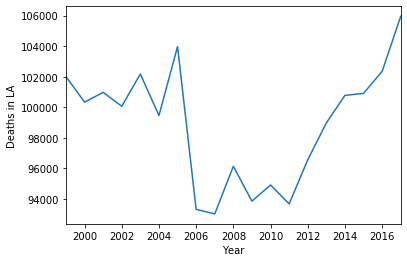

In [17]:
year_info["Deaths"].plot.line().set_ylabel("Deaths in LA")

Text(0, 0.5, 'Population in LA')

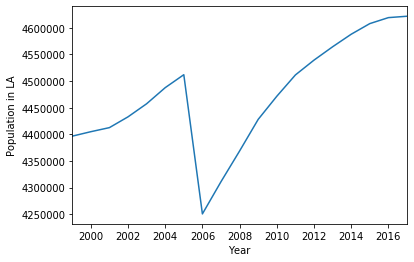

In [18]:
year_info["Population"].plot.line().set_ylabel("Population in LA")

**Analysis**

My first graph shows the changes in deaths and population numbers in Louisiana. It is interesting to note the peak of deaths around 2005 and the drop in population around 2005 which large coinsides with Hurricane Katrina.
Additionally the increase in deaths since 2012 is likely correlated to the increase in population since 2012 as more people move back to Louisiana.

### Plot B: Absolute Death Counts by Age for years 1999-2017, Louisiana

For my second graph as I explore this data, I want the total death counts by age range for all the years in the dataset. This abstracts a lot of the data and just gives you the general counts. For each year, I computed these numbers by boolean masking to get data only from that year. Then I grouped by the Age Range column to get the sum of the death counts.

In [19]:
age_counts = pd.DataFrame()

In [20]:
for year in range(1999,2018):
    age_counts[str(year)] = deaths_df[deaths_df["Year"] == year].groupby("Age Range").Deaths.sum()
    
    
age_counts

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Age Range,,,,,,,,,,,,,,,,,,,
1-4,154,210,227,207,129,160,182,84,139,160,129,95,136,93,92,169,168,137,134
15-24,1693,1842,1702,1858,1895,2019,2045,1906,1856,1851,1578,1444,1296,1278,1362,1299,1355,1425,1479
25-34,1855,1780,2003,2082,2097,2260,2349,2388,2544,2141,2020,2252,2101,2094,2275,2400,2401,2619,2698
35-44,4241,4133,4317,4187,4391,4132,4298,3864,3883,3531,3316,3403,3112,3214,3375,3288,3413,3620,3955
45-54,7529,7857,8148,8202,8771,8829,9495,8886,8585,9151,8965,8728,8589,8462,8329,8652,8086,8044,7686
5-14,326,296,277,288,182,300,274,165,189,208,167,137,172,156,126,134,185,162,127
55-64,11665,12091,12126,12187,12815,12735,13740,13057,13060,13888,13942,14245,14390,15244,16313,16782,16977,17149,17551
65-74,20949,19846,19318,18776,18873,18132,18318,16738,16436,16807,17353,17551,17611,18857,19378,19963,20255,21011,22182
75-84,28312,27455,28453,28227,28324,27636,27813,24531,23896,24614,23731,23820,22816,23085,23365,23543,23284,23091,24136


The following cell helps reorder the index of the above. It was unfortunate that the 5-14 age range was not in order. Thus I utilized pandas to turn a variable into a categorical variable. Then when I call sort_index(), it properly sorts the categorical variables as I would like.

In [21]:
order = ["1-4", "5-14", "15-24", "25-34", "35-44", "45-54", "55-64", "65-74", "75-84", "85+"]
age_counts.index = pd.Categorical(age_counts.index, order)

age_counts.sort_index(inplace=True)
age_counts

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1-4,154,210,227,207,129,160,182,84,139,160,129,95,136,93,92,169,168,137,134
5-14,326,296,277,288,182,300,274,165,189,208,167,137,172,156,126,134,185,162,127
15-24,1693,1842,1702,1858,1895,2019,2045,1906,1856,1851,1578,1444,1296,1278,1362,1299,1355,1425,1479
25-34,1855,1780,2003,2082,2097,2260,2349,2388,2544,2141,2020,2252,2101,2094,2275,2400,2401,2619,2698
35-44,4241,4133,4317,4187,4391,4132,4298,3864,3883,3531,3316,3403,3112,3214,3375,3288,3413,3620,3955
45-54,7529,7857,8148,8202,8771,8829,9495,8886,8585,9151,8965,8728,8589,8462,8329,8652,8086,8044,7686
55-64,11665,12091,12126,12187,12815,12735,13740,13057,13060,13888,13942,14245,14390,15244,16313,16782,16977,17149,17551
65-74,20949,19846,19318,18776,18873,18132,18318,16738,16436,16807,17353,17551,17611,18857,19378,19963,20255,21011,22182
75-84,28312,27455,28453,28227,28324,27636,27813,24531,23896,24614,23731,23820,22816,23085,23365,23543,23284,23091,24136
85+,25289,24827,24409,24055,24702,23263,25459,21707,22441,23791,22660,23247,23462,24084,24362,24552,24787,25096,26008


Then, this data is easily graphed with a bar graph since it simply showing counts. Now that the age range categories are properly ordered, you can easily the relation between age and death counts in Louisiana for sets of 6 years at a time.

Here you can see each year and each age group, and the y-axis are shared among all three graphs.

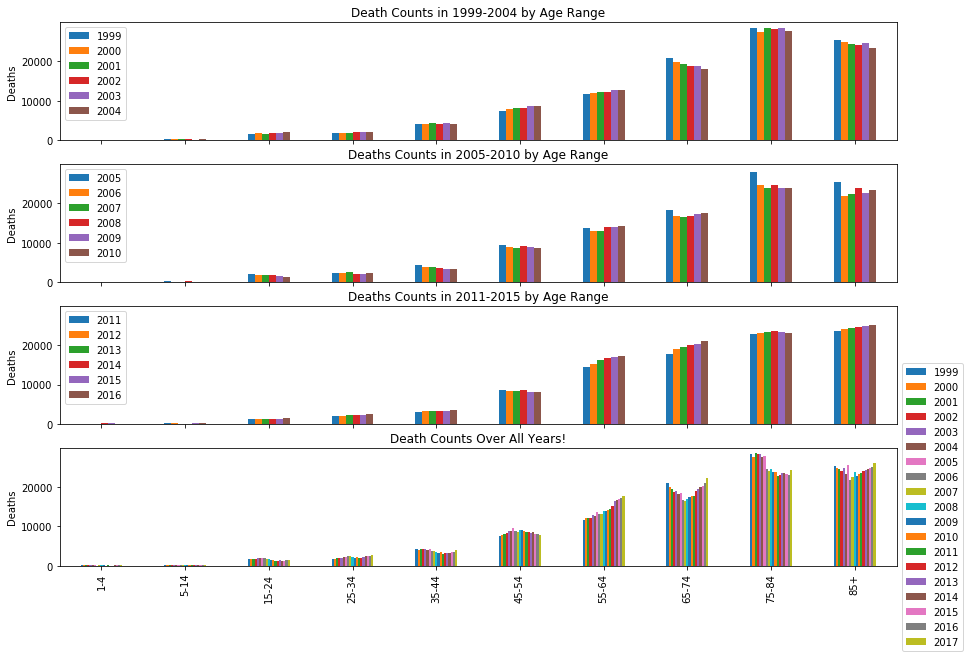

In [22]:
fig, ax = plt.subplots(4, 1, figsize=(15,10), sharey=True, sharex=True)

age_counts[["1999","2000","2001", "2002","2003","2004"]].plot.bar(title="Death Counts in 1999-2004 by Age Range",
                                                                  ax=ax[0]).set_ylabel("Deaths")

age_counts[["2005","2006","2007", "2008","2009","2010"]].plot.bar(title="Deaths Counts in 2005-2010 by Age Range", 
                                                                  ax=ax[1]).set_ylabel("Deaths")

age_counts[["2011","2012","2013", "2014","2015","2016"]].plot.bar(title="Deaths Counts in 2011-2015 by Age Range", 
                                                                  ax=ax[2]).set_ylabel("Deaths")

a = age_counts.plot.bar(title="Death Counts Over All Years!", ax=ax[3]).set_ylabel("Deaths")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

**Analysis**

From these graphs we can see three main things. We can see how absolute death counts compare across age groups, we can see how death counts trend over smaller 6 year intervals, and we can see how death counts trend over the last 17 years.

Here, we are able to see that the absolute death rates increase with each age group. This is to be expected as the aging populations increase. In the first three plots, we see a decrease in death counts for people over 65 in each year 1999-2004, mixed results in this age demographic in the years of 2005-2010, and increases in deaths over the years 2011-2016. However, looking at the 65-74 group and 85+ group the levels are very similar to how they were in 1999. They were decreasing until around 2006 and they began growing after that.

Another interesting thing in how in the 55-64 age group, death counts have steadily increased over the last 17 years. Alternatively, in the 75-84 age group, there was a sharp drop after 2005. 

I think a lot of the death rates centers around Katrina and the people who perished in that catastrope, the decrease in population following Katrina, and the hesitant individuals who began to return.

### Plot C: Crude Mortality Rates in 1999-2017, Louisiana

The previous plots showed absolute death rates but they do not paint as clear a picture as motality rates. These rates divide the death counts by the population in attempts to normalize the deaths across time with varying populations. The following rates are all at a rate of per 100,000 people which is the public health standard according to the CDC website.

In [23]:
cmr = pd.DataFrame()

for year in range(1999,2018):
    deaths_yr = deaths[deaths["Year"] == year].groupby("Age Range").Deaths.sum()
    total_pop_yr = deaths[deaths["Year"] == year].groupby("Age Range").Population.mean()

    cmr[str(year)] = (deaths_yr / total_pop_yr) * 100000
cmr

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Age Range,,,,,,,,,,,,,,,,,,,
1-4,60.857057,82.905645,90.286092,81.381680,50.257129,62.089626,70.416541,35.594427,59.238676,65.887818,51.683728,37.641950,53.650185,36.864533,37.212463,68.411913,67.706171,55.192752,53.690200
15-24,244.924649,266.371277,242.541355,262.529496,266.840899,282.848377,288.119880,290.762420,280.019915,278.720985,236.933024,217.114126,195.816241,194.128745,207.821536,199.829860,210.981304,226.233209,238.798355
25-34,304.806912,296.093233,341.102803,356.031937,358.622152,381.858027,391.798420,426.229157,441.777111,361.187448,329.254597,358.351646,327.142386,320.694931,343.580853,358.407952,355.137063,384.210264,396.947418
35-44,609.070424,597.283682,633.463978,625.431319,667.309002,636.276703,673.229796,652.945351,662.196316,611.976436,583.652793,602.728662,556.211897,574.435305,599.941339,580.972103,597.921203,630.392951,683.726108
45-54,1319.851414,1340.165214,1332.448087,1320.447619,1384.569727,1368.173274,1444.869003,1404.894522,1335.698227,1406.904610,1370.531060,1333.791786,1330.382092,1335.376429,1335.985307,1410.834662,1341.845294,1359.203943,1327.291503
5-14,47.266791,43.231117,41.240797,43.440159,27.611192,45.941174,42.350810,27.747834,31.439793,34.437371,27.456538,22.341886,27.903415,25.138301,20.237323,21.564245,29.956846,26.298701,20.746176
55-64,3125.368400,3189.833478,3120.408232,2966.672103,2984.417683,2846.917014,2943.778964,2814.499945,2707.324910,2779.423302,2684.680070,2659.822766,2569.528146,2689.072073,2824.023502,2854.732201,2841.196258,2843.847893,2895.292078
65-74,7385.952974,7014.579836,6856.530350,6671.996873,6672.252508,6373.980996,6364.615545,5988.165342,5751.558968,5682.033321,5679.006689,5625.428694,5470.715781,5519.294261,5456.163172,5384.752328,5247.803591,5227.800323,5326.846277
75-84,16372.510467,15659.221573,15909.306942,15507.636523,15366.836843,14868.456448,14918.096096,13817.323615,13390.490600,13721.249150,13233.883560,13220.333339,12534.748547,12627.934073,12626.863091,12540.482380,12181.392040,11837.107134,12005.809905


In [87]:
cmr.index = pd.Categorical(cmr.index, order)
cmr.sort_index(inplace=True)

In [88]:
cmr_mean = numpy.array(cmr.mean(axis=1))

0 1-4 58.99834659516158
1 5-14 31.913182593260085
2 15-24 243.75450810546437
3 25-34 359.6439109159874
4 35-44 619.9560721043317
5 45-54 1358.066514445106
6 55-64 2860.044158695466
7 65-74 5984.183043710857
8 75-84 13807.351701323798
9 85+ 37255.216508867365


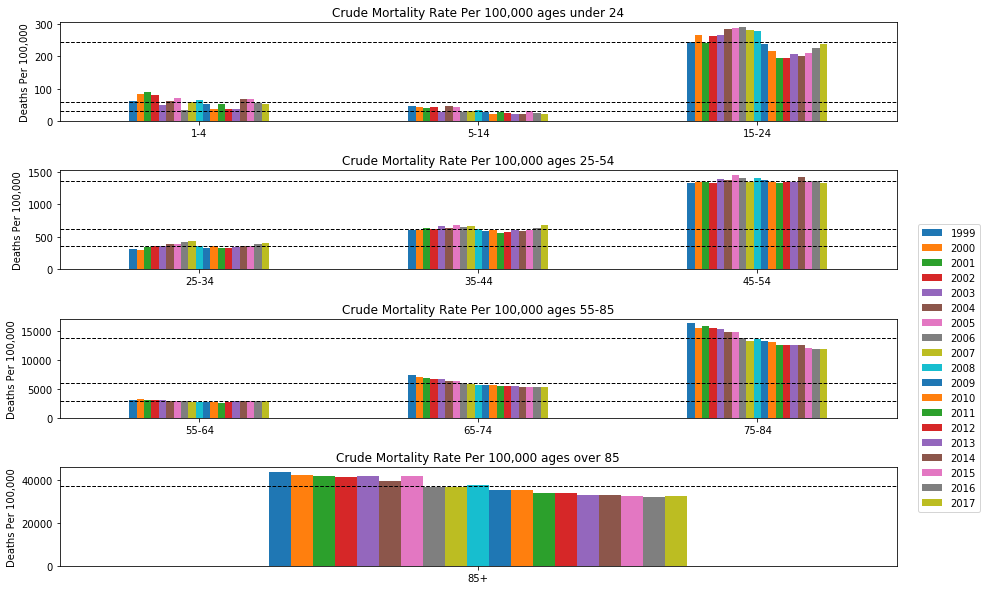

In [91]:
age_ranges = deaths["Age Range"].unique()

fig, ax = plt.subplots(4, 1, figsize=(15,10))

cmr.loc[["1-4", "5-14", "15-24"]].plot.bar(title="Crude Mortality Rate Per 100,000 ages under 24", ax=ax[0], legend=False, rot=0, zorder=1).set_ylabel("Deaths Per 100,000")

cmr.loc[["25-34","35-44", "45-54"]].plot.bar(title="Crude Mortality Rate Per 100,000 ages 25-54", ax=ax[1], legend=False, rot=0, zorder=1).set_ylabel("Deaths Per 100,000")

cmr.loc[["55-64","65-74", "75-84"]].plot.bar(title="Crude Mortality Rate Per 100,000 ages 55-85", ax=ax[2], legend=False, rot=0, zorder=1).set_ylabel("Deaths Per 100,000")

cmr.loc[["85+"]].plot.bar(title="Crude Mortality Rate Per 100,000 ages over 85", ax=ax[3], legend=False, rot=0, zorder=1).set_ylabel("Deaths Per 100,000")


for i in range(0,10):
    index = int(i/3)
    ax[index].axhline(y=cmr_mean[i] ,color='black', linewidth=1, ls="--", zorder=1)
    print(i, age_ranges[i], cmr_mean[i])


plt.legend(loc='center left', bbox_to_anchor=(1.02, 2.0))
plt.subplots_adjust(hspace=0.5)

**Analysis**

Alternatively to the absolute death counts, for the Crude Mortality Rate, I have plotted the information (which in total consists of year, age range, and the rate) by age range. The crude mortalitiy rates vary so drastically that when I plotted them all on one graph or separated by year, the 85+ age range and their average CMR of ~37,000 per 100,000 made the 1-4 age range average CMR of 58 deaths per 100,000 very small on the plot. It was not showing the information I sought to display and compare visually.


So just as the absolute death counts increase as you increase in age, the mortality rates per 100,000 increase as you increase in age.

In [26]:
# correlation between age and mortality rate?

---

## 4. Some point i am trying to make

,Age Range,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,plotting ages
0,1-4,60.857057,82.905645,90.286092,81.381680,50.257129,62.089626,70.416541,35.594427,59.238676,...,51.683728,37.641950,53.650185,36.864533,37.212463,68.411913,67.706171,55.192752,53.690200,2.5
1,15-24,244.924649,266.371277,242.541355,262.529496,266.840899,282.848377,288.119880,290.762420,280.019915,...,236.933024,217.114126,195.816241,194.128745,207.821536,199.829860,210.981304,226.233209,238.798355,19.5
2,25-34,304.806912,296.093233,341.102803,356.031937,358.622152,381.858027,391.798420,426.229157,441.777111,...,329.254597,358.351646,327.142386,320.694931,343.580853,358.407952,355.137063,384.210264,396.947418,29.5
3,35-44,609.070424,597.283682,633.463978,625.431319,667.309002,636.276703,673.229796,652.945351,662.196316,...,583.652793,602.728662,556.211897,574.435305,599.941339,580.972103,597.921203,630.392951,683.726108,39.5
4,45-54,1319.851414,1340.165214,1332.448087,1320.447619,1384.569727,1368.173274,1444.869003,1404.894522,1335.698227,...,1370.531060,1333.791786,1330.382092,1335.376429,1335.985307,1410.834662,1341.845294,1359.203943,1327.291503,49.5
5,5-14,47.266791,43.231117,41.240797,43.440159,27.611192,45.941174,42.350810,27.747834,31.439793,...,27.456538,22.341886,27.903415,25.138301,20.237323,21.564245,29.956846,26.298701,20.746176,9.5
6,55-64,3125.368400,3189.833478,3120.408232,2966.672103,2984.417683,2846.917014,2943.778964,2814.499945,2707.324910,...,2684.680070,2659.822766,2569.528146,2689.072073,2824.023502,2854.732201,2841.196258,2843.847893,2895.292078,59.5
7,65-74,7385.952974,7014.579836,6856.530350,6671.996873,6672.252508,6373.980996,6364.615545,5988.165342,5751.558968,...,5679.006689,5625.428694,5470.715781,5519.294261,5456.163172,5384.752328,5247.803591,5227.800323,5326.846277,69.5
8,75-84,16372.510467,15659.221573,15909.306942,15507.636523,15366.836843,14868.456448,14918.096096,13817.323615,13390.490600,...,13233.883560,13220.333339,12534.748547,12627.934073,12626.863091,12540.482380,12181.392040,11837.107134,12005.809905,79.5
9,85+,44065.168148,42312.018543,41861.462210,41396.341358,42180.936443,39489.051095,41947.176775,36977.037340,36924.722336,...,35264.091631,35391.103127,34249.094943,34045.801527,33242.365527,32988.471771,32623.488069,32398.239114,32539.285357,90.0


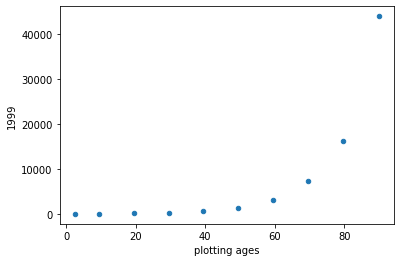

In [27]:
cmr_plot = cmr.reset_index().copy()
cmr_plot["plotting ages"] = pd.Series(cmr_plot["Age Range"].map({"1-4": 2.5,
                                 "5-14": 9.5,
                                 "15-24": 19.5,
                                 "25-34": 29.5,
                                 "35-44": 39.5,
                                 "45-54": 49.5,
                                 "55-64": 59.5,
                                 "65-74": 69.5,
                                 "75-84": 79.5,
                                 "85+": 90}))

cmr_plot.plot.scatter(x="plotting ages", y="1999")
# may have to melt to get plot all the years
cmr_plot

correlation:

In [28]:
deaths_df[deaths_df["Year"] == 2017]

,Year,Age Range,ICD-10 113 Cause List,ICD-10 113 Cause List Code,Deaths,Population,Crude Rate,Cause
9067,2017,1-4,"#Congenital malformations, deformations and ch...",GR113-109,12,249580,NaN,"#Congenital malformations, deformations and ch..."
9068,2017,1-4,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,45,249580,18.0,#Accidents (unintentional injuries)
9069,2017,1-4,"Transport accidents (V01-V99,Y85)",GR113-113,19,249580,NaN,Transport accidents
9070,2017,1-4,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,19,249580,NaN,Motor vehicle accidents
9071,2017,1-4,"Nontransport accidents (W00-X59,Y86)",GR113-117,26,249580,10.4,Nontransport accidents
9072,2017,1-4,Accidental drowning and submersion (W65-W74),GR113-120,13,249580,NaN,Accidental drowning and submersion
9073,2017,5-14,All other diseases (Residual),GR113-111,18,612161,NaN,All other diseases (Residual)
9074,2017,5-14,"#Accidents (unintentional injuries) (V01-X59,Y...",GR113-112,40,612161,6.5,#Accidents (unintentional injuries)
9075,2017,5-14,"Transport accidents (V01-V99,Y85)",GR113-113,20,612161,3.3,Transport accidents
9076,2017,5-14,"Motor vehicle accidents (V02-V04,V09.0,V09.2,V...",GR113-114,18,612161,NaN,Motor vehicle accidents


---

## 5. Conclusion and Further Study